In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

In [30]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


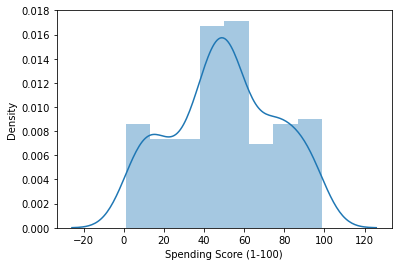

In [ ]:
#3. Perform Below Visualizations.
#∙ Univariate Analysis
import seaborn as sns
sns.distplot(df['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


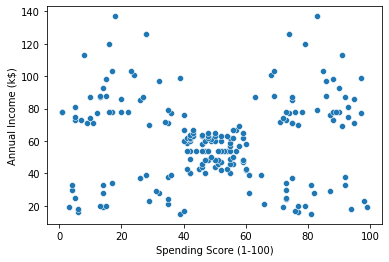

In [ ]:
#bivariate analysis
sns.scatterplot(df['Spending Score (1-100)'],df['Annual Income (k$)'])

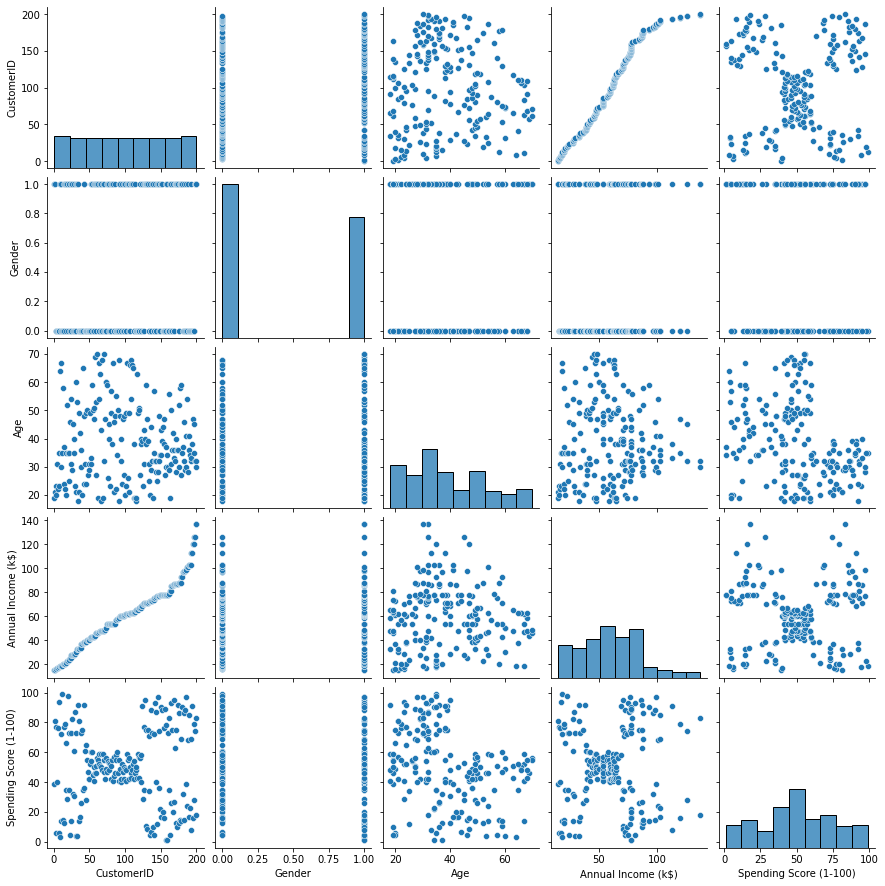

In [ ]:
#multivariate analysis
sns.pairplot(df)


In [ ]:
#11. Split the data into dependent and independent variables.
x = df.iloc[:, 3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [32]:
#9. Perform any of the clustering algorithms
df1=df[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [33]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

In [37]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30566.45113025185,
 24990.434310396893,
 21850.165282585636,
 19721.547527312738]

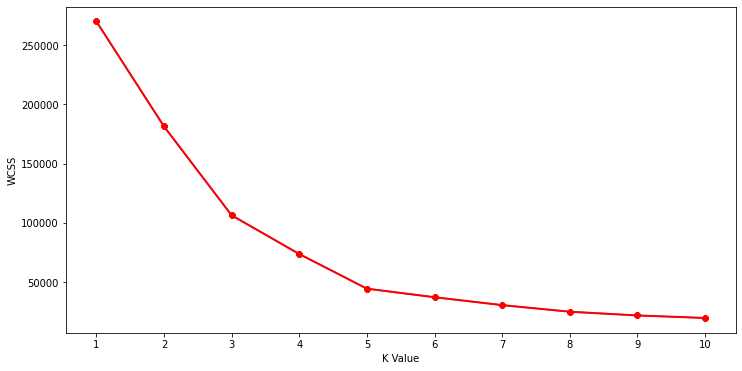

In [38]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [35]:
#10. Add the cluster data with the primary dataset
#5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


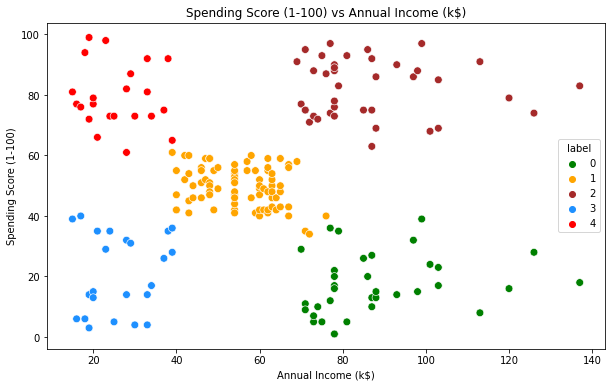

In [36]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [ ]:
#4. Perform descriptive statistics on the dataset.
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#5. Check for Missing values and deal with them.
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6251139cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6251020f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6251012f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6251029a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f62510124d0>],
 'means': []}

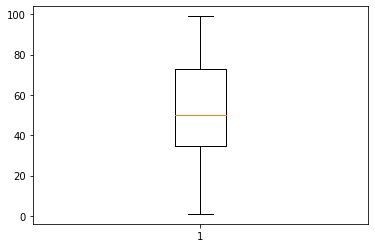

In [ ]:
#6. Find the outliers and replace them outliers
plt.boxplot(df['Spending Score (1-100)'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


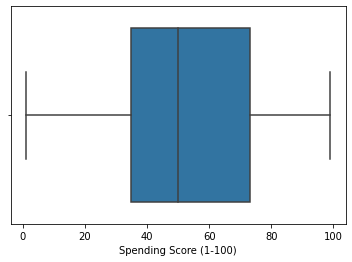

In [ ]:
Q1 = df['Spending Score (1-100)'].quantile(0.25)
Q3 = df['Spending Score (1-100)'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Spending Score (1-100)']=np.where(df['Spending Score (1-100)']>upper_whisker,upper_whisker,np.where(df['Spending Score (1-100)']<lower_whisker,lower_whisker,df['Spending Score (1-100)']))
df = df
sns.boxplot(df['Spending Score (1-100)'],data=df)

In [ ]:
#7. Check for Categorical columns and perform encoding.
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
#categorical column
categorical = df.select_dtypes(include=['object']).copy()
categorical.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [67]:
df1.Gender = df1.Gender.replace({"Male":1,"Female":0})
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


In [68]:
# 11. Split the data into dependent and independent variables.
X= df1.iloc[:,:-1]
X                             

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [58]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [69]:
y=df1.label

In [ ]:
#9. Scale the independent variables
from sklearn.preprocessing import MinMaxScaler
scale1 = MinMaxScaler()
xscaled = scale1.fit_transform(X)

In [70]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [61]:
x_train.shape

(160, 5)

In [62]:
y_train.shape

(160,)

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [64]:
#11. Build the Model
model = DecisionTreeRegressor(random_state =1)

In [71]:
#12. Train the Model
model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [73]:
y_preds = model.predict(x_train)

In [74]:
#Evaluating the score of our model
import math
from sklearn.metrics import mean_absolute_error,r2_score
print(math.sqrt(mean_absolute_error(y_train,y_preds)))


0.0


In [75]:
print(r2_score(y_train,y_preds))

1.0


In [77]:
print(accuracy_score(y_train,y_preds))

1.0


In [80]:
# test data
y_test_preds = model.predict(x_test)

In [82]:
#Evaluating the score of our model
import math
from sklearn.metrics import mean_absolute_error,r2_score
print(math.sqrt(mean_absolute_error(y_test,y_test_preds)))


0.31622776601683794


In [83]:
print(accuracy_score(y_test,y_test_preds))

0.925
